---

# <center> ML Project - Pima Indians Diabetes Detection 💉

---

<img src="pd.png" style="width: 600px;"/>

---

### Description:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. <br><br>The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict whether or not the patients have diabetes.
- Compare the evaluation metrics of vaious classification algorithms.

---

## <center>1. Data Exploration

In [298]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [299]:
#Importing the dataset

df = pd.read_csv('pima-indians-diabetes.csv')
df.reset_index(drop=True, inplace=True)
original_dataset = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Inference: The Datset consists of 9 features & 768 samples.


In [300]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
#Checking the stats of all the columns

display(df.describe())
print('\n \033[1mInference:\033[0m The stats seem to be unrealistic for few samples, \
let us visualize the dataset to gain better understanding...')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



 Inference: The stats seem to be unrealistic for few samples, let us visualize the dataset to gain better understanding...


---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


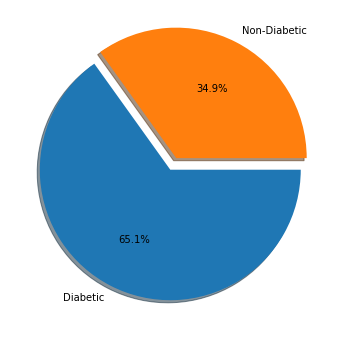


Inference: The Target Variable seems to be slightly imbalanced! We can try to fix this later on...


In [302]:
#Let us first analyze the distribution of the target variable

print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df.Outcome.value_counts(), labels=['Diabetic','Non-Diabetic'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1)
plt.show()

print('\n\033[1mInference:\033[0m The Target Variable seems to be slightly imbalanced! We can try to fix this later on...')

                                                    Features Distribution                                                     


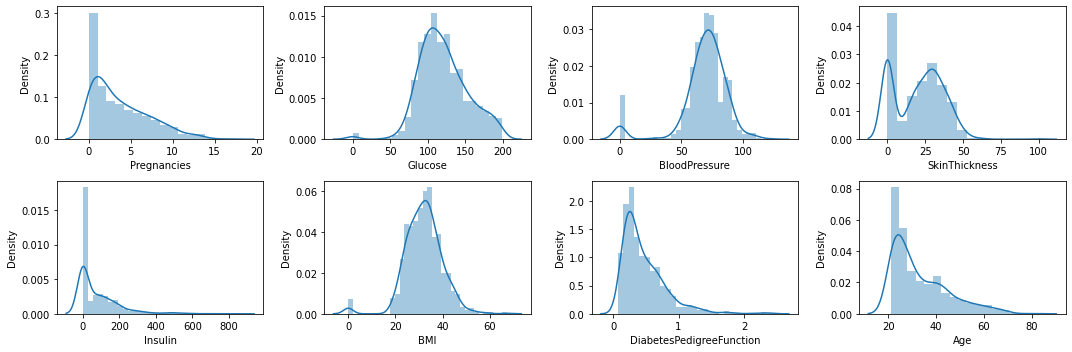

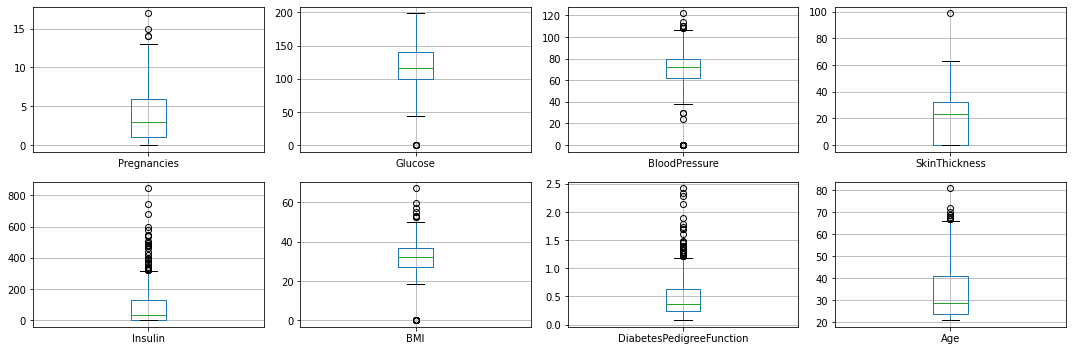


Inference: The data distribution revealed the multiple samples are inaccurate, like glucose, bloodpressure, BMI, which are not supposed to be zero. We shall try to fix these in the upcoming cleanup stage...


In [303]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(130))

plt.figure(figsize=[15,5])
for c in range(8):
    plt.subplot(2,4,c+1)
    sns.distplot(df[df.columns[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5])
for c in range(8):
    plt.subplot(2,4,c+1)
    df.boxplot(df.columns[c])
plt.tight_layout()
plt.show()

print('\n\033[1mInference:\033[0m The data distribution revealed the multiple samples are inaccurate, like glucose, \
bloodpressure, BMI, which are not supposed to be zero. We shall try to fix these in the upcoming cleanup stage...')

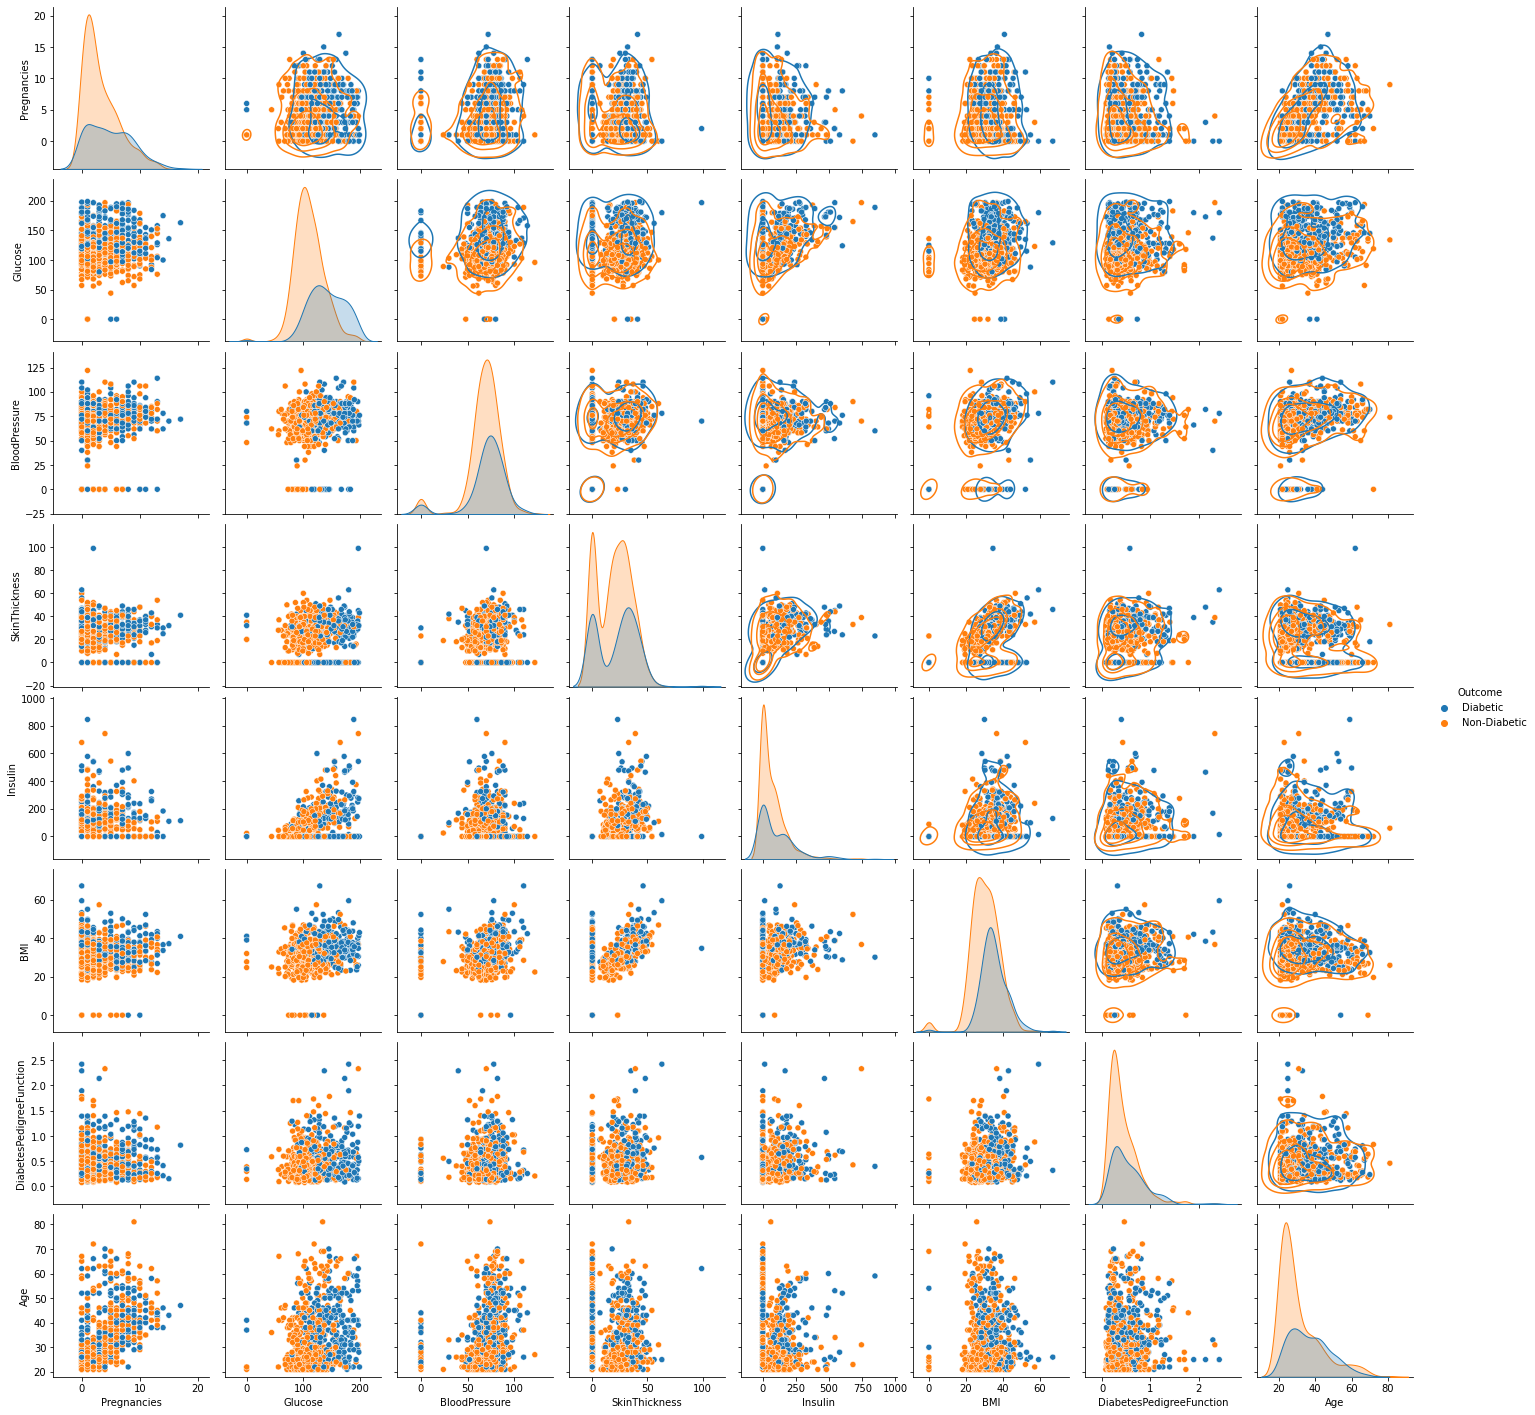


Inference: The data samples of most of the features don't show an exact pattern. Also they seemto have lot of overlap for the outcome classes, making it difficult to be distingusihable.


In [73]:
#Understanding the relationship between all the features

df1 = df.copy()
df1.Outcome = df.Outcome.map({0:'Non-Diabetic',1:'Diabetic'})

g=sns.pairplot(df1, hue="Outcome")
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

print('\n\033[1mInference:\033[0m The data samples of most of the features don\'t show an exact pattern. Also they seem\
to have lot of overlap for the outcome classes, making it difficult to be distingusihable.')

---

## <center> 3. Data Preprocessing

In [304]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Inference: The dataset doesn't have any null elements


In [305]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = df1.shape

df.drop_duplicates(inplace=True)

if df.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [306]:
xf = df.columns.to_list()
xf.remove('Outcome')
xf

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [307]:
#Removal of outlier:

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
display(df)
df2 = df.copy()
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
631,10,101,76,48,180,32.9,0.171,63,0
632,2,122,70,27,0,36.8,0.340,27,0
633,5,121,72,23,112,26.2,0.245,30,0
634,1,126,60,0,0,30.1,0.349,47,1



Inference: After removal of outliers, The dataset now has 9 features & 636 samples.


In [308]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE

print('Original class distribution:')
print(df.Outcome.value_counts())

X = df.drop(['Outcome'],axis=1)
Y = df.Outcome

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df3 = pd.DataFrame(X, columns=xf)
df3['Outcome'] = Y
df = df3.copy()

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    439
1    197
Name: Outcome, dtype: int64

Class distribution after applying SMOTE Technique:
1    439
0    439
Name: Outcome, dtype: int64


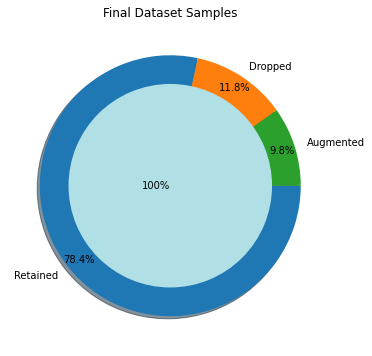


Inference:The final dataset after cleanup has 9 samples & 878 rows.


In [309]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], df1.shape[0]-df2.shape[0], df.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[1], df.shape[0]))

---

## <center> 4. Feature Selection/Extraction

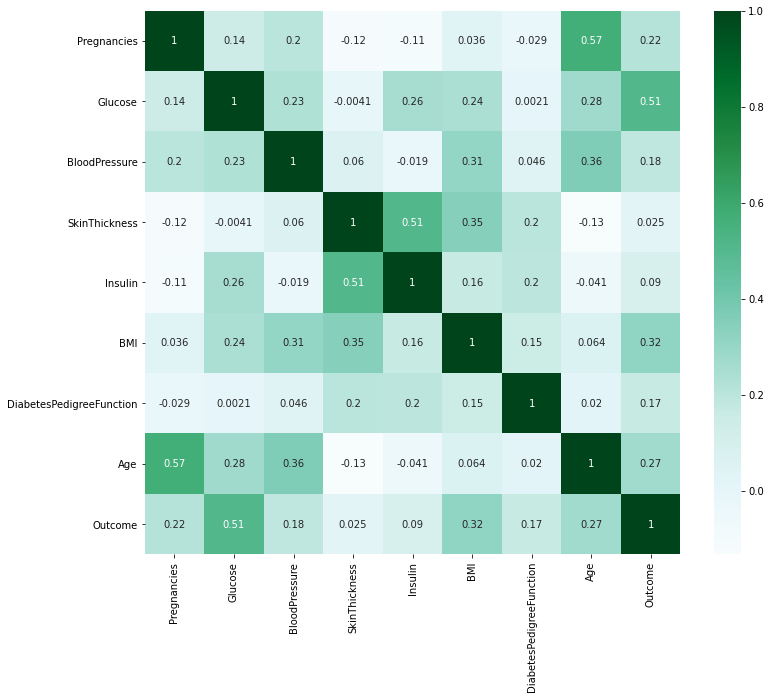


Inference:
Correlation plt between the variables convey lot of information about the realationshipbetweem them. 
Some of them are obvious like realtionship between number of pregrenencies & age, glucose & diabtes, etc.It is fine to drop any one one of the variable either age, or pregnancies. But for our problem since we are having lessfeatures and the correlation is also not too strong, we can proceed without dropping any feature. Feel free to comparethe results with dropping any feature...


In [310]:
#Checking the correlation

plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True, cmap='BuGn')#, vmin=-1, vmax=1)
plt.show()

print('\n\033[1mInference:\033[0m\nCorrelation plt between the variables convey lot of information about the realationship\
betweem them. \nSome of them are obvious like realtionship between number of pregrenencies & age, glucose & diabtes, etc.\
It is fine to drop any one one of the variable either age, or pregnancies. But for our problem since we are having less\
features and the correlation is also not too strong, we can proceed without dropping any feature. Feel free to compare\
the results with dropping any feature...')

---

## <center> 5. Feature Scaling

In [311]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'],axis=1)
Y = df.Outcome
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (878, 8) (878,) 
Training set  --->  (702, 8) (702,) 
Testing set   --->  (176, 8)  (176,)


In [312]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Test_X_std = std.transform(Test_X)

---

## <center> 6. Predictive Modeling

In [313]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SV)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SV),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [314]:
#Let us define functions to summarise the Prediction's scores .

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred, average='weighted'),3)*100
    print('{}{}\033[1m{}\033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<-----------------------------------Logistic Regression (LR)----------------------------------->>>

Accuracy = 71.6%
F1 Score = 71.3%

 Confusiton Matrix:
 [[73 16]
 [34 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74        89
           1       0.77      0.61      0.68        87

    accuracy                           0.72       176
   macro avg       0.73      0.71      0.71       176
weighted avg       0.72      0.72      0.71       176



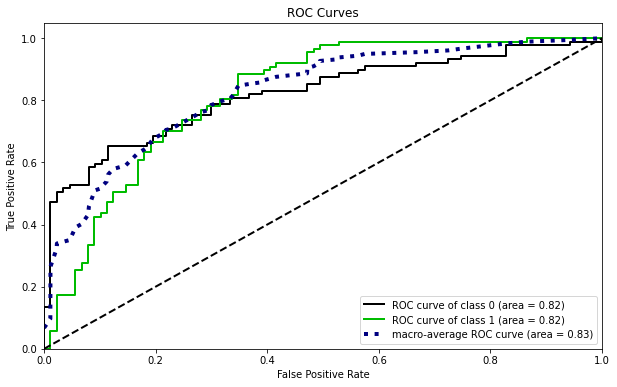

In [315]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(Train_X_std, Train_Y)
pred = LR.predict(Test_X_std)
Classification_Summary(pred,0)

pred_prob = LR.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 2. Decisoin Tree Classfier:

<<<-----------------------------------Decision Tree Classifier (DT)----------------------------------->>>

Accuracy = 77.3%
F1 Score = 77.2%

 Confusiton Matrix:
 [[74 15]
 [25 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        89
           1       0.81      0.71      0.76        87

    accuracy                           0.77       176
   macro avg       0.78      0.77      0.77       176
weighted avg       0.78      0.77      0.77       176



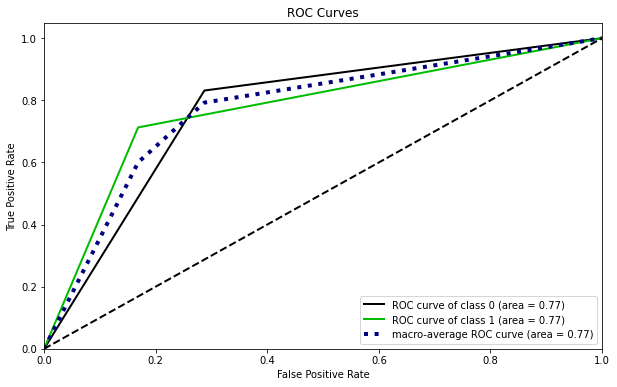

In [316]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(Train_X_std, Train_Y)
pred = DT.predict(Test_X_std)
Classification_Summary(pred,1)

pred_prob = DT.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 3. Random Forest Classfier:

<<<-----------------------------------Random Forest Classifier (RF)----------------------------------->>>

Accuracy = 80.10000000000001%
F1 Score = 80.0%

 Confusiton Matrix:
 [[77 12]
 [23 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        89
           1       0.84      0.74      0.79        87

    accuracy                           0.80       176
   macro avg       0.81      0.80      0.80       176
weighted avg       0.81      0.80      0.80       176



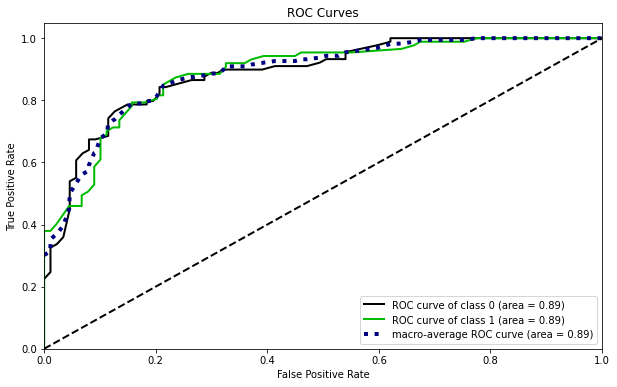

In [317]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier().fit(Train_X_std, Train_Y)
pred = RF.predict(Test_X_std)
Classification_Summary(pred,2)

pred_prob = RF.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 4. Naive Bayes Classfier:

<<<-----------------------------------Naïve Bayes Classifier (NB)----------------------------------->>>

Accuracy = 71.0%
F1 Score = 70.6%

 Confusiton Matrix:
 [[73 16]
 [35 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74        89
           1       0.76      0.60      0.67        87

    accuracy                           0.71       176
   macro avg       0.72      0.71      0.71       176
weighted avg       0.72      0.71      0.71       176



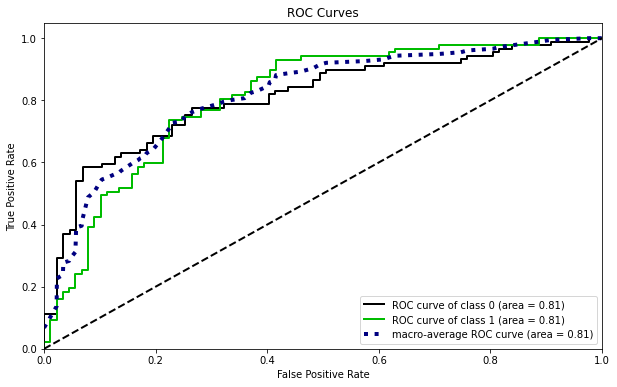

In [318]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(Train_X_std, Train_Y)
pred = NB.predict(Test_X_std)
Classification_Summary(pred,3)

pred_prob = NB.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 5. Support Vector Machine Classfier:

<<<-----------------------------------Support Vector Machine (SV)----------------------------------->>>

Accuracy = 79.5%
F1 Score = 79.5%

 Confusiton Matrix:
 [[75 14]
 [22 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        89
           1       0.82      0.75      0.78        87

    accuracy                           0.80       176
   macro avg       0.80      0.79      0.79       176
weighted avg       0.80      0.80      0.79       176



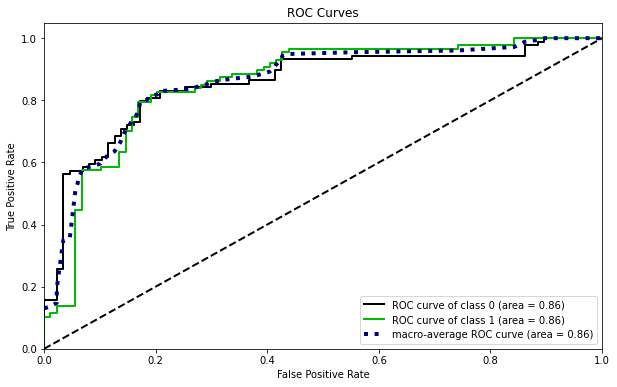

In [319]:
from sklearn.svm import SVC

SV = SVC(probability=True).fit(Train_X_std, Train_Y)
pred = SV.predict(Test_X_std)
Classification_Summary(pred,4)

pred_prob = SV.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 6. K-Nearest Neighbours Classfier:

<<<-----------------------------------K Nearest Neighbours (KNN)----------------------------------->>>

Accuracy = 76.1%
F1 Score = 76.1%

 Confusiton Matrix:
 [[65 24]
 [18 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76        89
           1       0.74      0.79      0.77        87

    accuracy                           0.76       176
   macro avg       0.76      0.76      0.76       176
weighted avg       0.76      0.76      0.76       176



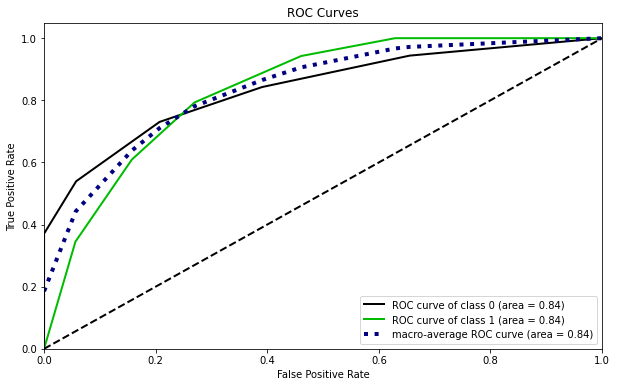

In [320]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(Train_X_std, Train_Y)
pred = KNN.predict(Test_X_std)
Classification_Summary(pred,5)

pred_prob = KNN.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 7. Gradient Boosting Classfier:

<<<-----------------------------------Gradient Boosting (GB)----------------------------------->>>

Accuracy = 79.0%
F1 Score = 79.0%

 Confusiton Matrix:
 [[73 16]
 [21 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        89
           1       0.80      0.76      0.78        87

    accuracy                           0.79       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.79      0.79       176



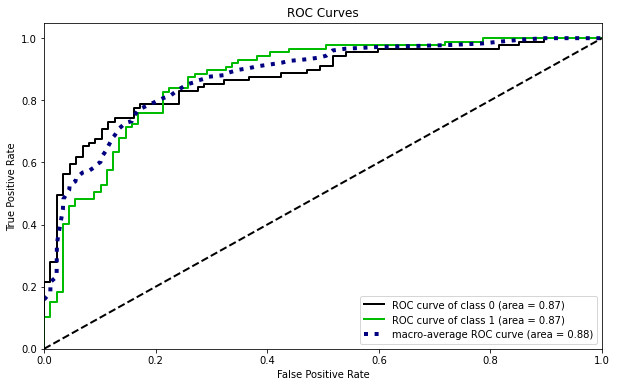

In [321]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
pred = GB.predict(Test_X_std)
Classification_Summary(pred,6)

pred_prob = GB.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

---

## 8. Extreme Gradient Boosting Classfier:

[22:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<-----------------------------------Extreme Gradient Boosting (XGB)----------------------------------->>>

Accuracy = 78.4%
F1 Score = 78.4%

 Confusiton Matrix:
 [[72 17]
 [21 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        89
           1       0.80      0.76      0.78        87

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



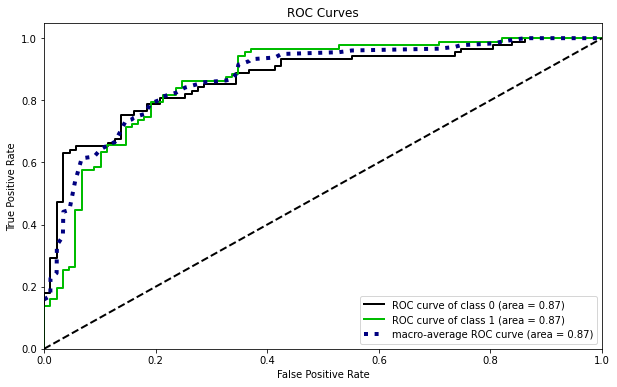

In [322]:
from xgboost import XGBClassifier

XGB = XGBClassifier().fit(Train_X_std, Train_Y)
pred = XGB.predict(Test_X_std)
Classification_Summary(pred,7)

pred_prob = XGB.predict_proba(Test_X_std)
auc(Test_Y, pred_prob, curves=['macro','each_class'])
plt.show()

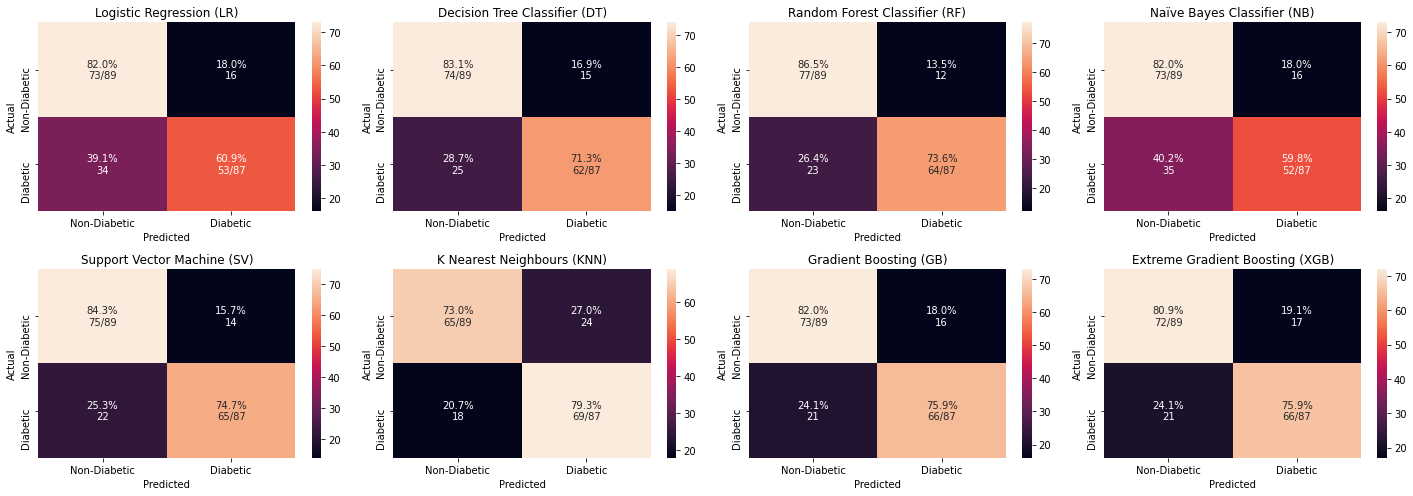

In [323]:
#Plotting Confusion-Matrix of all the predictive Models

labels=['Non-Diabetic','Diabetic']

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,7])
    
    for i in range(len(all_models)):
        plt.subplot(2,4,i+1)
        pred = all_models[i].predict(Test_X_std)
        plot_cm(Test_Y, pred)
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SV,KNN,GB,XGB])

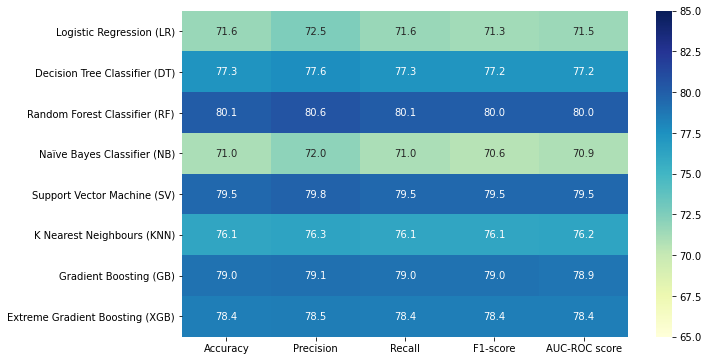

In [327]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=65.0, vmax=85.0, cmap='YlGnBu', fmt='.1f')
plt.show()

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 768 samples & after preprocessing 17.2% of the datasamples were dropped. 
- The diabetic samples were 30% more than non-diabetic ones, hence SMOTE Technique was applied on the data to  balance the classes, adding 11.8% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the class seperability.
- Feature selection or feature extracting was not exercised, as there were only 8 features, which overall contributed towards the right prediction.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- Random Forest perform the best on the current dataset, followed by Support Vector Machines & Boosting Algorithms
- Yet it wise to also consider simpler models as they are more generalisable & take lesser training time.

In [ ]:
<<<----------------------------------------------------THE END------------------------------------------------------------->>>